# Sudden stop Models

## Contractionary Depreciations

This notebook shall help you to replicate "From Sudden Stops to Fisherian Deflation Quantitative Theory and Policy" by Anton Korinek and Enrique Mendoza (2013)

## The setup

Following Mendoza [2010] and Korinek [2011], a model of small open economy(SOE) featuring a continuum of infinitely lived, identical agents facing a CRRA utility function. There is no production, we don’t make a distinction between households, firms or entrepreneurs.


\begin{equation} 
E{}_{0}=
 \left\{ \sum_{t=0}^{\infty}\beta^{t}u(c_{t})\right\}
\end{equation}

The representative agent maximizes the expected future discounted value of consumption where $\beta$ is the subjective discount factor. There are two types of goods available in the economy: traded ones, and non-traded ones. The aggregator for consumption will be of the CES  type.

\begin{equation} 
c_{t}=\left[\alpha\left(c_{t}^{T}\right)^{-\mu}+\left(1-\alpha\right)\left(c_{t}^{N}\right)^{-\mu}\right]^{-1/\mu}
\end{equation}

where $\mu>-1$ , $\alpha\in(0,1)$ and $1/(1+\mu)$ is the elasticity of substitution between tradable and nontradable goods. Each period household receives an endowment  $\left(y^{T},y^{N}\right)$ and decides how much to consume and chooses the level of bond holdings according given budget constraint:

\begin{equation} 
\frac{ b_{t+1}}{R}+c_{t}^{T}+p_{t}^{N}c_{t}^{N}=b_{t}+y_{t}^{T}+p_{t}^{N}y_{t}^{N}
\end{equation}

The price of tradable goods are determined in the world market and taken as numeraire such that price of nontradables $p^N$ is the relative price of non-tradable goods in terms of tradable goods. The menu of assets available for saving purposes is restricted to a one period, non-state-contingent bond denominated in tradables which hold the price $R$ with $R=(1+r)$ where $r$ is the interest rate determined exogenously.

Access to international financial markets is imperfect. We assume that creditors restrict loans such that the value of debt does not exceed a fraction of tradable income $\kappa^T$ plus a fraction $\kappa^N$ of non-tradable income. 

\begin{equation}  
\frac{b_{t+1}}{R}\geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)
\end{equation}

- Equilibrium
The household chooses the stochastic process ${\left\{ c_{t}^{T},c_{t}^{N},b_{t+1}\right\} _{t\geq0}}$ to maximize the expected present discounted value of utility subject to budget and credot constraints taking $b_{0}$ and $p_{t}^{N}$ as given. The first order conditions are:

\begin{equation}
\lambda_{t}=u_{T}\left(t\right)
\end{equation}

\begin{equation} 
p_{t}^{N}=\frac{(1-\alpha)}{\alpha}\left(\frac{c_{t}^{T}}{c_{t}^{N}}\right)^{\mu+1}
\end{equation}

\begin{equation} 
\lambda_{t}=\beta R E_{t}\lambda_{t+1}+\eta_{t}
\end{equation}

\begin{equation} 
\frac{b_{t+1}}{R} \geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)\quad \textrm{with equality if }\quad \eta_{t}>0
\end{equation}


Since household are identical and non-traded goods should be consumed in the domestic market , market clearing conditions are:

\begin{equation}
c_{t}^{N}=y_{t}^{N}
\end{equation}

\begin{equation}
c_{t}^{T}=b_{t}+y_{t}^{T}- \frac{b_{t+1}}{R} 
\end{equation}

Here importantly we see that, in the equilibrium version of the credit constraint $c_{t}^{T}$ enters into the constraint. Price of nontradable goods is a function of both tradable and nontradable consumption such that in case of a binding constraint, a reduction of $c_{t}^{T}$ generates a fall in the price of nontradable consumption which by equation 

> $\frac{b_{t+1}}{R} \geq-\left(\kappa^{N}p_{t}^{N}y_{t}^{N}+\kappa^{T}y^{T}\right)$

tightens the credit constraint further. When constraint is loose there is no amplification and price price of nontradables adjust in response to such changes.




For more detailes we refer the reader to the page of Korinek
http://www.korinek.com/suddenstops

## Importing necessary libraries


In [1]:
path = Pkg.dir("Dolo")
import Dolo
using AxisArrays

INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/Parameters.ji for module Parameters.
INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/LineSearches.ji for module LineSearches.
INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/NLsolve.ji for module NLsolve.
INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/Optim.ji for module Optim.
INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/QuantEcon.ji for module QuantEcon.
INFO: Recompiling stale cache file /home/ezgi/.julia/lib/v0.6/BasisMatrices.ji for module BasisMatrices.


## Writing the model

In [2]:
fn = ("https://raw.githubusercontent.com/ezgioz/Dolo.jl/master/examples/models/sudden_stop.yaml");


In [4]:
model = Dolo.yaml_import(fn);

### Characteristics of MC process used in our example:

In [7]:
#The process hasa transition probability matrix
print(model.exogenous.transitions)
# and values for two states: bad state & good state
print(model.exogenous.values)


[0.5 0.5; 0.5 0.5][0.87; 1.0]

Let us simulate the process


In [5]:
model.exogenous

Dolo.DiscreteMarkovProcess(Dolo.UnstructuredGrid{1}, [0.5 0.5; 0.5 0.5], [0.87; 1.0], 1)

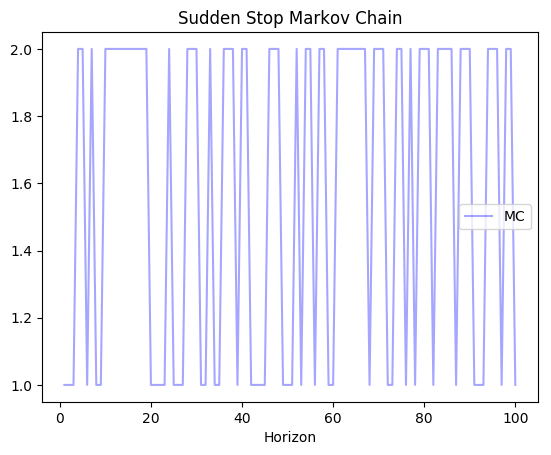

In [6]:
N= 1 # number  of simulations
T=100 # periods of simulation
hor= linspace(1, T, T)

import PyPlot
plt = PyPlot;

fig = plt.figure("Sudden Stop Markov Chain")
sim_mc= Dolo.simulate(model.exogenous, N, T, 1)

plt.plot(hor, sim_mc, color="blue", alpha = .35, label ="MC")
plt.legend()
plt.xlabel("Horizon");
plt.title("Sudden Stop Markov Chain");

## Solving the model using time iteration routines

In [7]:
@time sol = Dolo.time_iteration(model, verbose=false, maxit=10000)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] filter(::Function, ::Base.Generator{UnitRange{Int64},Dolo.##65#67{Dolo.DiscreteMarkovProcess,Int64}}) at ./deprecated.jl:57
 [3] get_integration_nodes(::Dolo.DiscreteMarkovProcess, ::Int64) at /home/ezgi/.julia/v0.6/Dolo/src/numeric/processes.jl:418
 [4] euler_residuals(::Dolo.Model{Symbol("##756")}, ::Dolo.DiscreteMarkovProcess, ::Array{Float64,2}, ::Array{Array{Float64,2},1}, ::Array{Float64,1}, ::Dolo.CachedDecisionRule{Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1},Dolo.DiscreteMarkovProcess}) at /home/ezgi/.julia/v0.6/Dolo/src/algos/time_iteration.jl:31
 [5] euler_residuals(::Dolo.Model{Symbol("##756")}, ::Dolo.DiscreteMarkovProcess, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Dolo.CachedDecisionRule{Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1},Dolo.DiscreteMarkovProcess}) at /home/ezgi/.julia/v0.6/Dolo/src/algos/time_iteration.jl:44
 [6] #serial_solver#2

 20.554199 seconds (19.44 M allocations: 950.062 MiB, 3.25% gc time)


Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscreteMarkovProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1}
 * Number of iterations: 28
 * Convergence: true
   * |x - x'| < 1.0e-07: true


In [13]:
@time sol = Dolo.improved_time_iteration(model, sol.dr, verbose=false, maxit=10000)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] filter(::Function, ::Base.Generator{UnitRange{Int64},Dolo.##65#67{Dolo.DiscreteMarkovProcess,Int64}}) at ./deprecated.jl:57
 [3] get_integration_nodes(::Dolo.DiscreteMarkovProcess, ::Int64) at /home/ezgi/.julia/v0.6/Dolo/src/numeric/processes.jl:418
 [4] #euler_residuals#219(::Bool, ::Bool, ::Array{Float64,5}, ::Array{Float64,4}, ::Function, ::Dolo.Model{Symbol("##805")}, ::Array{Float64,2}, ::Array{Array{Float64,2},1}, ::Dolo.CachedDecisionRule{Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1},Dolo.DiscreteMarkovProcess}, ::Dolo.DiscreteMarkovProcess, ::Array{Float64,1}) at /home/ezgi/.julia/v0.6/Dolo/src/algos/ITI_additional.jl:39
 [5] (::Dolo.#kw##euler_residuals)(::Array{Any,1}, ::Dolo.#euler_residuals, ::Dolo.Model{Symbol("##805")}, ::Array{Float64,2}, ::Array{Array{Float64,2},1}, ::Dolo.CachedDecisionRule{Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1},Dolo.DiscreteMarkovProces

LoadError: [91mInexactError()[39m

In [9]:
# Define the decision rule 
dr = sol.dr

Dolo.CubicDR{Dolo.UnstructuredGrid{1},Dolo.CartesianGrid{1},2,1}


## Plotting the policy function


To plot a decision rule we are using a ${\color{blue}{Dolo.tabulate}}$ function which simulates the variables of the model for a given (provided) state. In the sake of comparability analysis, we are plotting the decision corresponding to the MC case corresponding to the low and high states of endowment.

In [24]:
df_mc1 = Dolo.tabulate(model, dr, :l, s0, 3)

LoadError: [91mBoundsError: attempt to access 2-element Array{Array{SVector{2,Float64},1},1} at index [3][39m

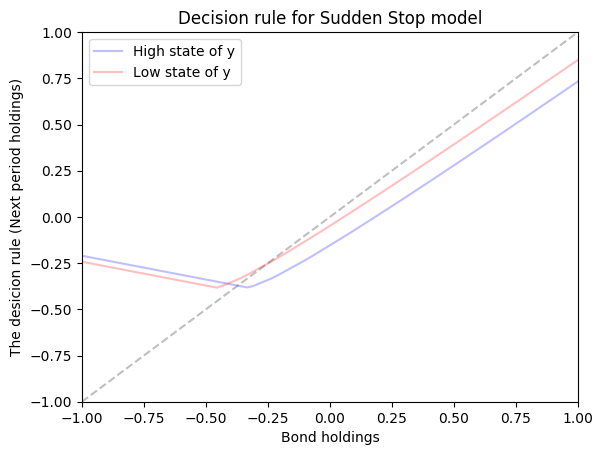

In [11]:
# Simulating a decision rule for MC-discretization case
m0 = model.calibration[:exogenous]
s0 = model.calibration[:states]
index = findfirst(model.symbols[:states],:l)

# Define the bounds for your states variable
bounds = [dr.grid_endo.min[index], dr.grid_endo.max[index]]

df_mc1 = Dolo.tabulate(model, dr, :l, s0, 1)
df_mc2 = Dolo.tabulate(model, dr, :l, s0, 2)

hor= linspace(1, T, T)

fig = plt.figure("Competitive Equilibrium")

plt.plot(df_mc1[:l], df_mc1[Axis{:V}(:b)], color="blue", alpha = .25, label="High state of y")
plt.plot(df_mc2[:l], df_mc2[Axis{:V}(:b)], color="red", alpha = .25, label="Low state of y")


plt.plot(df_mc2[:l], df_mc2[:l], color="black", linestyle="dashed", alpha = .25)

plt.ylim((bounds[1],bounds[2]))
plt.xlim((bounds[1],bounds[2]))

plt.xlabel("Bond holdings");
plt.legend()
plt.ylabel("The desicion rule (Next period holdings)");
plt.title("Decision rule for Sudden Stop model");

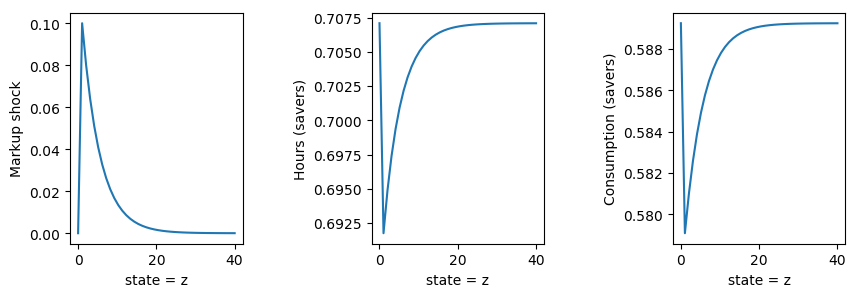

In [19]:
irf=Dolo.response(model, dr, s0, [0.1]; T=40)
hor =  linspace(0, 40, 40)

fig = plt.figure("Impulse response functions",figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(hor, irf[:l])
plt.ylabel("Markup shock");
plt.xlabel("state = z");
# plt.title("IRF");

plt.subplots_adjust(wspace=.75)
# plt.tight_layout()

plt.subplot(1,3,2)
plt.plot(hor, irf[:N_s])
plt.ylabel("Hours (savers)");
plt.xlabel("state = z");
# plt.title("IRF");

plt.subplot(1,3,3)
plt.plot(hor, irf[:C_s])
plt.ylabel("Consumption (savers)");
plt.xlabel("state = z");
# plt.title("IRF");

In [20]:
Dolo.simulate(model, dr)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, 1:1
    :V, Symbol[:e_z,:z,:Delta_L,:C_s,:N_s,:F1,:F2,:R,:real_r,:C]
    :T, 1:40
And data, a 1×10×40 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  1.0  0.589242  0.707086  …  3.94154  1.00502  1.00502  0.589237

[:, :, 2] =
 0.0116085  0.0116085  1.0  0.588063  …  3.963  1.00606  1.00542  0.587609

[:, :, 3] =
 0.00293267  0.0122194  1.00001  …  3.96417  1.00612  1.00544  0.587522

...

[:, :, 38] =
 0.00163093  -0.00715909  1.00005  …  3.92866  1.00439  1.00478  0.590234

[:, :, 39] =
 -0.0113794  -0.0171067  1.00004  …  3.91063  1.0035  1.00443  0.591641

[:, :, 40] =
 0.0134351  -0.000250212  1.00004  …  3.94125  1.00501  1.00502  0.589263

## Simulating a model

In [21]:
using AxisArrays
using Unitful
import Unitful: s, ms, µs

In [22]:
# N = number of simulations, T = horizon
sim = Dolo.simulate(model, dr; N= 1000, T=50)

# compute the median 
a_sort = sort(collect(sim[Axis{:V}(:N_s)]),1)
a_median = a_sort[Int(size(sim,1)*0.5),:]

hor = linspace(1, sim[Axis{:T}][end], sim[Axis{:T}][end])

50-element LinSpace{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,…,44.0,45.0,46.0,47.0,48.0,49.0,50.0

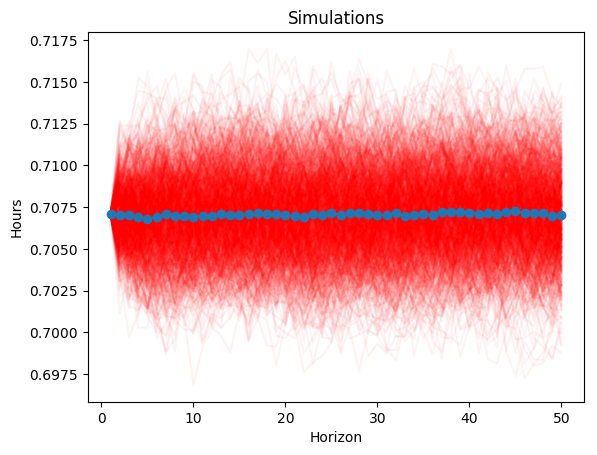

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb210edfbe0>

In [23]:
for i in 1:sim[Axis{:N}][end]
    plt.plot(hor, sim[Axis{:N}(i), Axis{:V}(:N_s)], color="red", alpha = .05)
end
plt.title("Simulations");
plt.xlabel("Horizon");
plt.ylabel("Hours");

plt.plot(hor, a_median, marker="o")




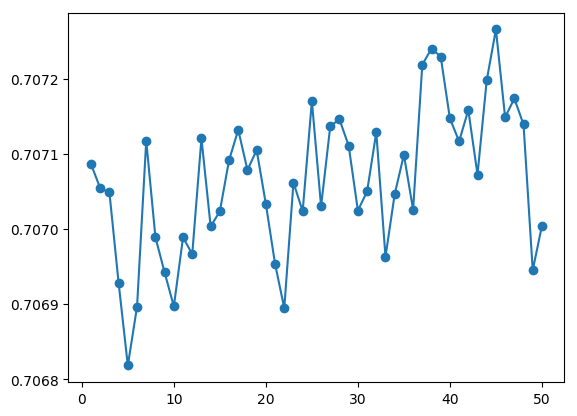

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb210bbb518>

In [24]:
plt.plot(hor, a_median, marker="o")
